In [107]:
%matplotlib inline

import numpy as np
import pandas as pd

from tensorflow import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tensorflow.keras import backend as K

import math

import matplotlib.pyplot as plt

In [13]:
df_train = pd.read_csv("./dataset/train.csv")

df_train = df_train[['OverallQual', 'GrLivArea', 'YearBuilt', 'SalePrice']]
df_train.shape

(1460, 4)

In [105]:
data = df_train[['OverallQual', 'GrLivArea', 'YearBuilt']]
target = df_train[['SalePrice']]

In [108]:
scaler = preprocessing.MinMaxScaler().fit(data)
data[data.columns] = pd.DataFrame(scaler.transform(data), index=data.index)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [109]:
X = data.values
y = target.values
X = X.reshape(X.shape[0], X.shape[1], 1)

print(X.shape, y.shape)

(1460, 3, 1) (1460, 1)


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [142]:

'''
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)    
'''
    
    
model = keras.Sequential([

    keras.layers.Conv1D(filters=16000, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    keras.layers.MaxPooling1D(pool_size=2), # 
    keras.layers.Flatten(),
    keras.layers.Dense(8000, activation='relu'),
    keras.layers.Dense(1)

])
model.compile(optimizer='adam', loss='mse', metrics=['mae']) # , metrics=['mse']

In [143]:
from keras.callbacks import EarlyStopping
 
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=True) # validation_data=(X_test, y_test)


Epoch 1/500
30/30 [==============================] - 3s 83ms/step - loss: 38918103040.0000 - mae: 180904.5000 - val_loss: 36749746176.0000 - val_mae: 178167.5156
Epoch 2/500
30/30 [==============================] - 2s 74ms/step - loss: 34497384448.0000 - mae: 168726.1562 - val_loss: 26540390400.0000 - val_mae: 147970.5156
Epoch 3/500
30/30 [==============================] - 2s 74ms/step - loss: 17709242368.0000 - mae: 108467.7344 - val_loss: 5827387904.0000 - val_mae: 51524.0508
Epoch 4/500
30/30 [==============================] - 2s 75ms/step - loss: 4367437824.0000 - mae: 45328.1758 - val_loss: 3388897536.0000 - val_mae: 47629.0117
Epoch 5/500
30/30 [==============================] - 2s 75ms/step - loss: 3943161600.0000 - mae: 46273.6523 - val_loss: 3122271744.0000 - val_mae: 40580.3828
Epoch 6/500
30/30 [==============================] - 2s 74ms/step - loss: 3866539520.0000 - mae: 42425.4688 - val_loss: 3048385792.0000 - val_mae: 41661.6641
Epoch 7/500
30/30 [=======================

30/30 [==============================] - 2s 76ms/step - loss: 1787683712.0000 - mae: 28434.5332 - val_loss: 1275237120.0000 - val_mae: 25697.1074
Epoch 53/500
30/30 [==============================] - 2s 76ms/step - loss: 1776091776.0000 - mae: 28438.1738 - val_loss: 1299230336.0000 - val_mae: 25360.2695
Epoch 54/500
30/30 [==============================] - 2s 76ms/step - loss: 1789865216.0000 - mae: 28599.4473 - val_loss: 1270263808.0000 - val_mae: 25619.6543
Epoch 55/500
30/30 [==============================] - 2s 76ms/step - loss: 1767519104.0000 - mae: 28343.4805 - val_loss: 1274313216.0000 - val_mae: 25397.3809
Epoch 56/500
30/30 [==============================] - 2s 76ms/step - loss: 1775122816.0000 - mae: 28345.3867 - val_loss: 1267893120.0000 - val_mae: 25703.6113
Epoch 57/500
30/30 [==============================] - 2s 76ms/step - loss: 1802683008.0000 - mae: 28714.8730 - val_loss: 1275764224.0000 - val_mae: 26097.1133
Epoch 58/500
30/30 [==============================] - 2s 76

30/30 [==============================] - 2s 74ms/step - loss: 1757467008.0000 - mae: 28315.9316 - val_loss: 1251932800.0000 - val_mae: 25406.2500
Epoch 104/500
30/30 [==============================] - 2s 74ms/step - loss: 1791242240.0000 - mae: 28756.4395 - val_loss: 1258158208.0000 - val_mae: 26008.5859
Epoch 105/500
30/30 [==============================] - 2s 74ms/step - loss: 1747036544.0000 - mae: 28256.0820 - val_loss: 1248271104.0000 - val_mae: 25696.5039
Epoch 106/500
30/30 [==============================] - 2s 75ms/step - loss: 1742180864.0000 - mae: 28505.4219 - val_loss: 1303767424.0000 - val_mae: 25576.5488
Epoch 107/500
30/30 [==============================] - 2s 74ms/step - loss: 1835374720.0000 - mae: 28740.8184 - val_loss: 1276139136.0000 - val_mae: 25208.1055
Epoch 108/500
30/30 [==============================] - 2s 74ms/step - loss: 1746866432.0000 - mae: 28134.1191 - val_loss: 1253814144.0000 - val_mae: 25676.0762
Epoch 109/500
30/30 [==============================] -

30/30 [==============================] - 2s 64ms/step - loss: 1712425600.0000 - mae: 28093.4277 - val_loss: 1288913408.0000 - val_mae: 25379.8418
Epoch 155/500
30/30 [==============================] - 2s 65ms/step - loss: 1716263168.0000 - mae: 27999.4238 - val_loss: 1227512448.0000 - val_mae: 25809.4121
Epoch 156/500
30/30 [==============================] - 2s 66ms/step - loss: 1721366528.0000 - mae: 27854.7422 - val_loss: 1213858304.0000 - val_mae: 25406.9062
Epoch 157/500
30/30 [==============================] - 2s 66ms/step - loss: 1769509760.0000 - mae: 28562.4023 - val_loss: 1230235392.0000 - val_mae: 25074.3418
Epoch 158/500
30/30 [==============================] - 2s 65ms/step - loss: 1705130624.0000 - mae: 27918.9141 - val_loss: 1216031872.0000 - val_mae: 25538.5840
Epoch 159/500
30/30 [==============================] - 2s 66ms/step - loss: 1738504448.0000 - mae: 28357.8438 - val_loss: 1312919552.0000 - val_mae: 27537.5605
Epoch 160/500
30/30 [==============================] -

30/30 [==============================] - 2s 63ms/step - loss: 1664152448.0000 - mae: 27358.4023 - val_loss: 1154015616.0000 - val_mae: 24348.0000
Epoch 206/500
30/30 [==============================] - 2s 63ms/step - loss: 1679826688.0000 - mae: 27387.0723 - val_loss: 1153468544.0000 - val_mae: 24302.4551
Epoch 207/500
30/30 [==============================] - 2s 63ms/step - loss: 1672824448.0000 - mae: 27308.8828 - val_loss: 1144709888.0000 - val_mae: 24450.9766
Epoch 208/500
30/30 [==============================] - 2s 63ms/step - loss: 1664121856.0000 - mae: 27183.9707 - val_loss: 1160350336.0000 - val_mae: 24232.9336
Epoch 209/500
30/30 [==============================] - 2s 63ms/step - loss: 1663938432.0000 - mae: 27043.9492 - val_loss: 1145473536.0000 - val_mae: 24519.7754
Epoch 210/500
30/30 [==============================] - 2s 63ms/step - loss: 1670675328.0000 - mae: 27230.9570 - val_loss: 1149274624.0000 - val_mae: 24205.1191
Epoch 211/500
30/30 [==============================] -

30/30 [==============================] - 2s 63ms/step - loss: 1606880384.0000 - mae: 26248.8066 - val_loss: 1102011392.0000 - val_mae: 23373.0059
Epoch 257/500
30/30 [==============================] - 2s 63ms/step - loss: 1602009216.0000 - mae: 26173.1074 - val_loss: 1081518848.0000 - val_mae: 23428.6660
Epoch 258/500
30/30 [==============================] - 2s 63ms/step - loss: 1606465152.0000 - mae: 26108.4297 - val_loss: 1107622528.0000 - val_mae: 23353.4062
Epoch 259/500
30/30 [==============================] - 2s 63ms/step - loss: 1610692864.0000 - mae: 26409.3848 - val_loss: 1235301888.0000 - val_mae: 24682.2363
Epoch 260/500
30/30 [==============================] - 2s 64ms/step - loss: 1652519808.0000 - mae: 26570.0898 - val_loss: 1078884736.0000 - val_mae: 23321.7520
Epoch 261/500
30/30 [==============================] - 2s 63ms/step - loss: 1605749632.0000 - mae: 26171.7578 - val_loss: 1075525376.0000 - val_mae: 23305.0020
Epoch 262/500
30/30 [==============================] -

In [144]:
loss = model.evaluate(X_test, y_test)[0]
print("Mean squared error on test data: ", loss)
print("Square Mean squared error on test data: ", math.sqrt(loss))

10/10 [==============================] - 0s 15ms/step - loss: 1605150848.0000 - mae: 25405.4727
Mean squared error on test data:  1605150848.0
Square Mean squared error on test data:  40064.33386442361


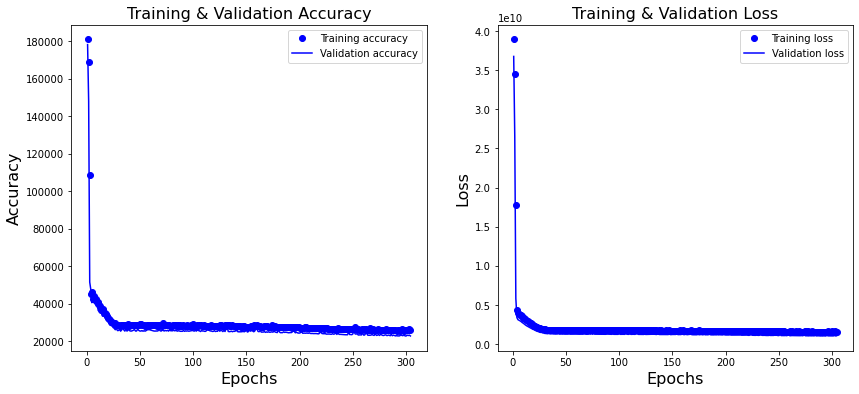

In [145]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()